In [16]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
! git clone https://github.com/4vel/python-intro.git

Cloning into 'python-intro'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 105 (delta 37), reused 95 (delta 27), pack-reused 0
Receiving objects: 100% (105/105), 24.14 MiB | 18.80 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [5]:
data = pd.read_pickle("python-intro/Hometask/df_nashdomrf.pkl")

In [6]:
data.shape

(11714, 110)

In [7]:
data.to_excel('dom.xlsx', index=False)
data.to_pickle('dom.pkl')

In [71]:
conn = sqlite3.connect('db')
data.applymap(str).to_sql('dom', conn, if_exists='replace', index = False)
conn.commit()
conn.close()

11714

In [74]:
df = data[(data['region'] == 77) | (data['region'] == 23)] # 23 - Краснодарский край, 77 - Москва
df['ready_dt'] = pd.to_datetime(df.objReady100PercDt)
df = df.drop(['developer.devId','developer.devShortCleanNm','developer.devShortNm','developer.devFullCleanNm','developer.problObjCnt','developer.buildObjCnt','developer.comissObjCnt','developer.regRegionDesc','developer.devPhoneNum','developer.devSite','developer.devEmail','developer.devInn','developer.devOgrn','developer.devKpp','developer.devLegalAddr','developer.devFactAddr','developer.lastRpdId','developer.fundGuarantyFlg','developer.devOrgRegRegionCd','developer.devEmplMainFullNm','developer.developerGroupName','developer.orgForm.id','developer.orgForm.fullForm','developer.orgForm.shortForm','developer.companyGroupId','developer.objGuarantyEscrowFlg',
         'developer.govFundFlg', 'objReady100PercDt', 'loadDttm', 'address', 'rpdPdfLink', 'objectTransportInfo', 'miniUrl', 'rpdNum', 'photoRenderDTO', 'generalContractorNm', 'nameObj', 'objLkLatitude', 'objLkSaleDepEmail', 'objLkLongitude', 'developer.bankruptStage.bankruptStageCd', 'developer.bankruptStage.bankruptStageDesc', 'developer.bankruptStage.bankruptLawUrl', 'developer.orgBankruptMsgDttm', 'metro.id', 'metro.name', 'metro.line', 'metro.color', 'metro.time', 'metro.isWalk', 'metro.colors', 'complexShortNm'], axis=1)

df['ready_year'] = pd.to_datetime(df['ready_dt']).dt.strftime('%Y')

<ipython-input-74-8164834311c9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [92]:
df.head()

,id,hobjId,pdId,region,floorMin,floorMax,objElemLivingCnt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdIssueDttm,objCompensFundFlg,objProblemFlg,objLkClassDesc,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,nonlivFirstFloor,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,airQualityIndexValue,greenAreaIndexValue,ready_dt,ready_year
17,45249,125859,530733,77,2,23,0,Монолит-кирпич,Под ключ,Нет,389,0.00,08-11-2023 14:55,0,0,Бизнес,1,normal,0,125859,23,0,0.0,627,0,True,16-06-2026 12:00,1,0.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,8,0.000672,231772.0,1.0,False,0,Не нормируется,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 / 10,5.0,NaN,8.0,2025-09-30,2025
26,35324,115219,290662,23,17,17,114,Монолит-кирпич,Без отделки,Нет,0,6343.20,10-08-2023 14:15,0,0,Типовой,1,normal,1,115219,17,114,6343.2,9,0,True,22-08-2023 12:00,0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,1.0,1.0,1,0.994437,45598.0,0.0,False,0,B,3.0,"2,8",93.0,15.0,6.0,0.0,114.0,1.0,9.0,NaN,NaN,NaN,NaN,2023-09-30,2023
27,41621,122145,472265,23,17,17,64,Монолит-кирпич,Под чистовую,Нет,0,4032.00,06-12-2023 10:01,0,0,Комфорт,1,normal,1,122145,17,64,4032.0,0,0,True,30-09-2024 12:00,0,3.0,3.0,4.0,90.0,28.0,1,1,0.0,1.0,0.0,1,1.000000,117612.0,0.0,True,0,D,4.0,"2,7",0.0,32.0,32.0,0.0,64.0,1.0,4.0,NaN,NaN,NaN,NaN,2024-03-31,2024
28,41619,122147,472265,23,14,14,120,Монолит-кирпич,Под чистовую,Нет,0,5472.48,06-12-2023 10:01,0,0,Комфорт,1,normal,1,122147,14,120,5472.48,0,0,True,30-09-2024 12:00,0,3.0,3.0,4.0,90.0,28.0,1,1,0.0,1.0,0.0,1,1.000000,135888.0,0.0,True,0,D,4.0,"2,7",48.0,72.0,0.0,0.0,120.0,1.0,10.0,NaN,NaN,NaN,NaN,2024-03-31,2024
29,41620,122146,472265,23,14,14,96,Монолит-кирпич,Под чистовую,Нет,0,6048.00,06-12-2023 10:01,0,0,Комфорт,1,normal,1,122146,14,96,6048.0,0,0,True,30-09-2024 12:00,0,3.0,3.0,4.0,90.0,28.0,1,1,0.0,2.0,0.0,2,0.977437,120123.0,0.0,True,0,D,4.0,"2,7",0.0,48.0,48.0,0.0,96.0,2.0,4.0,NaN,NaN,NaN,NaN,2024-03-31,2024


<Axes: ylabel='region'>

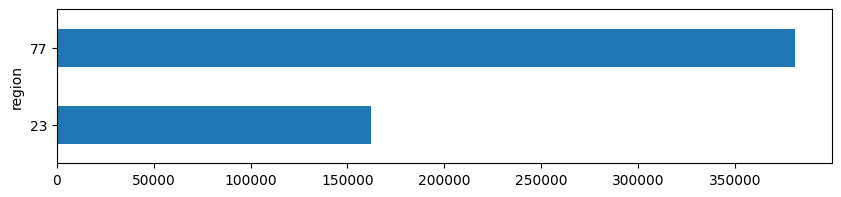

region
23    162334.729345
77    380934.022152
Name: objPriceAvg, dtype: float64

In [101]:
df_mean = df.groupby('region')['objPriceAvg'].mean()
rcParams['figure.figsize'] = 10,2
df_mean.plot(kind='barh')
plt.show()
df_mean

Кв. метр в 77 регионе дороже чем в 23, что логично. В столице недвижимость дороже

region
77     888
23    1112
Name: id, dtype: int64

<Axes: ylabel='region'>

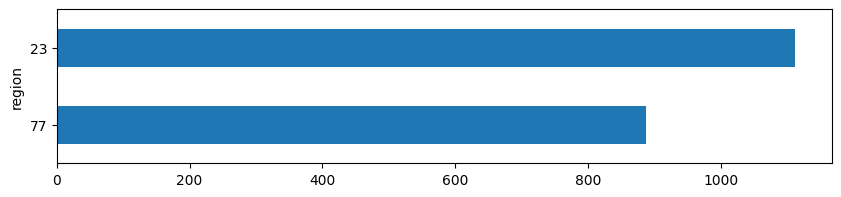

In [90]:
df_houses = df.groupby('region')['id'].count().sort_values(ascending=True)
df_houses.head()
rcParams['figure.figsize'] = 10,2
df_houses.plot(kind='barh')
plt.show()

Кол-во вводимого жилья в 77 регионе меньше чем в 23. Краснодарский край застраивается активнее

region  ready_year
23      2021            1
        2022            1
        2023           75
        2024          295
        2025          386
Name: id, dtype: int64

<Axes: ylabel='region,ready_year'>

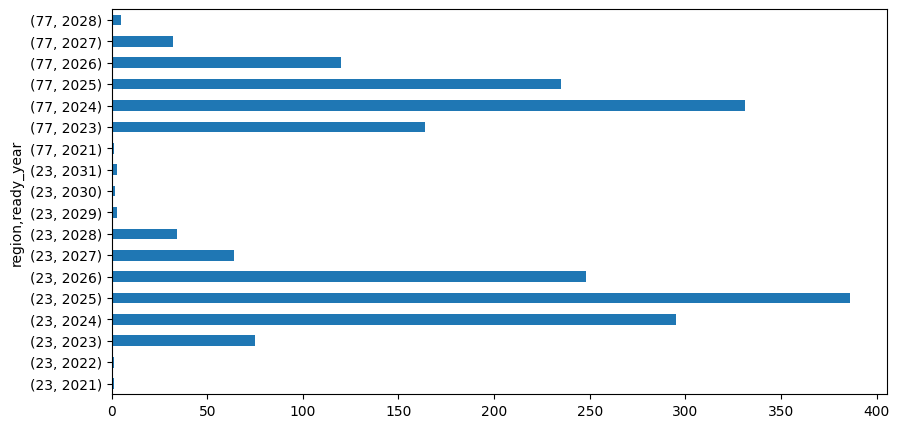

In [98]:
df_houses = df.groupby(['region', 'ready_year'])['id'].count()
df_houses.head()
rcParams['figure.figsize'] = 10, 5
df_houses.plot(kind='barh')
plt.show()

Видно, что в 2024 и 2025 больше всего вводимого жилья. Возможно, это связано со льготными ипотечными программами

<Axes: ylabel='region'>

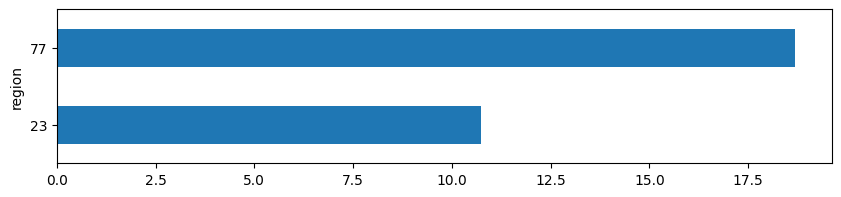

region
23    10.726619
77    18.682432
Name: floorMax, dtype: float64

In [100]:
df_mean = df.groupby('region')['floorMax'].mean()
rcParams['figure.figsize'] = 10,2
df_mean.plot(kind='barh')
plt.show()
df_mean

В среднем этажность в Москве в новостройках больше чем в Краснодарском крае.